# Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Get the Data

In [98]:
shoppers = pd.read_csv('online_shoppers_intention.csv')

# EDA

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

In [99]:
shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [100]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Data Preprocessing

In [101]:
shoppers_cleaned =shoppers.copy()

In [102]:
# Option: Calculate duration per page por each type of page
shoppers_cleaned.insert(loc=6, column='Product_TPP', value=np.where(shoppers.ProductRelated_Duration==0,0, shoppers.ProductRelated_Duration / shoppers.ProductRelated).round(2))
shoppers_cleaned.insert(loc=4, column='Informational_TPP', value=np.where(shoppers.Informational_Duration==0,0, shoppers.Informational_Duration / shoppers.Informational).round(2))
shoppers_cleaned.insert(loc=2, column='Administrative_TPP', value=np.where(shoppers.Administrative_Duration==0,0, shoppers.Administrative_Duration / shoppers.Administrative).round(2))

In [103]:
shoppers_cleaned

,Administrative,Administrative_Duration,Administrative_TPP,Informational,Informational_Duration,Informational_TPP,ProductRelated,ProductRelated_Duration,Product_TPP,BounceRates,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.00,0,0.0,0.0,1,0.000000,0.00,0.200000,...,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.00,0,0.0,0.0,2,64.000000,32.00,0.000000,...,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.00,0,0.0,0.0,1,0.000000,0.00,0.200000,...,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.00,0,0.0,0.0,2,2.666667,1.33,0.050000,...,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.00,0,0.0,0.0,10,627.500000,62.75,0.020000,...,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,48.33,0,0.0,0.0,53,1783.791667,33.66,0.007143,...,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0.00,0,0.0,0.0,5,465.750000,93.15,0.000000,...,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0.00,0,0.0,0.0,6,184.250000,30.71,0.083333,...,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,18.75,0,0.0,0.0,15,346.000000,23.07,0.000000,...,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


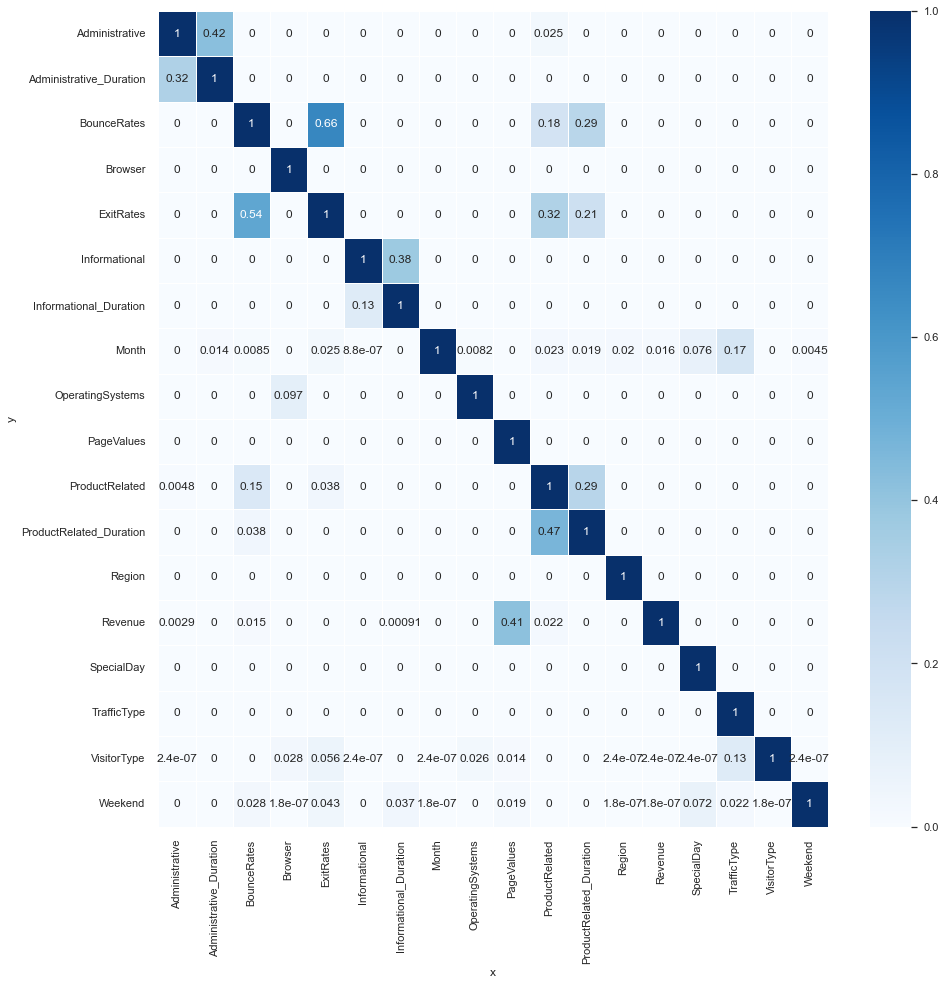

In [104]:
!pip install ppscore
import ppscore as pps
matrix_df = pps.matrix(shoppers)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

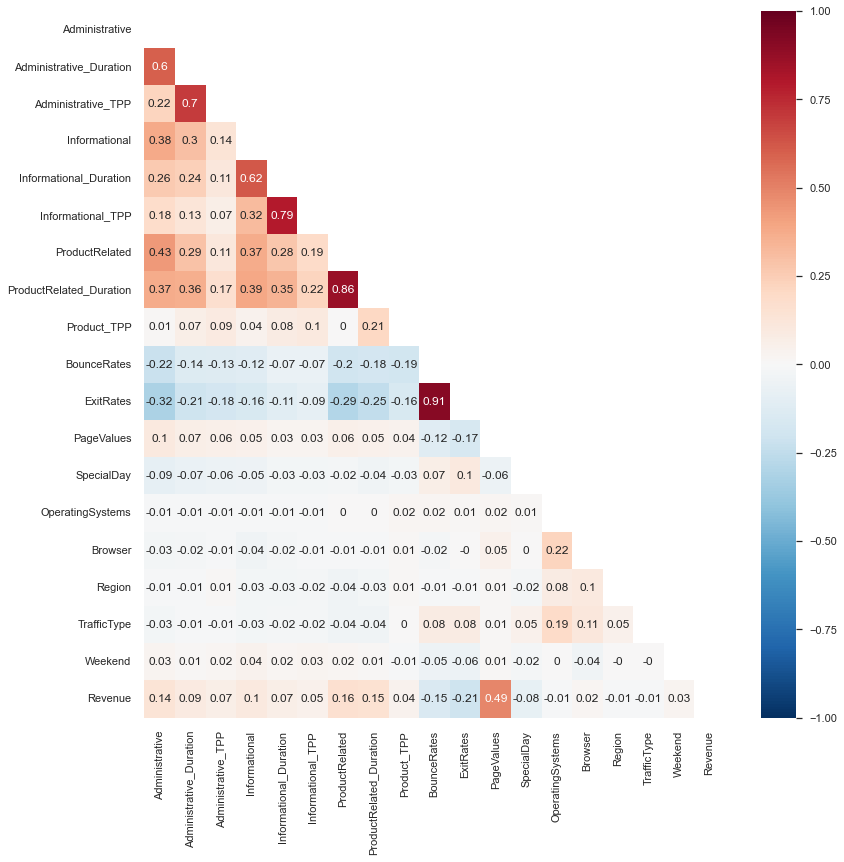

In [105]:
# Check for correlation
corr = shoppers_cleaned.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

In [106]:
# Drop the old columns, including Exit Rate since it has high correlation with Bounce Rate
shoppers_cleaned.drop(['Administrative'
                       ,'Administrative_Duration'
                       ,'Informational'
                       ,'Informational_Duration'
                       ,'ProductRelated'
                       ,'ProductRelated_Duration'
                       ,'ExitRates'
                      ]
                     , axis=1, inplace=True)

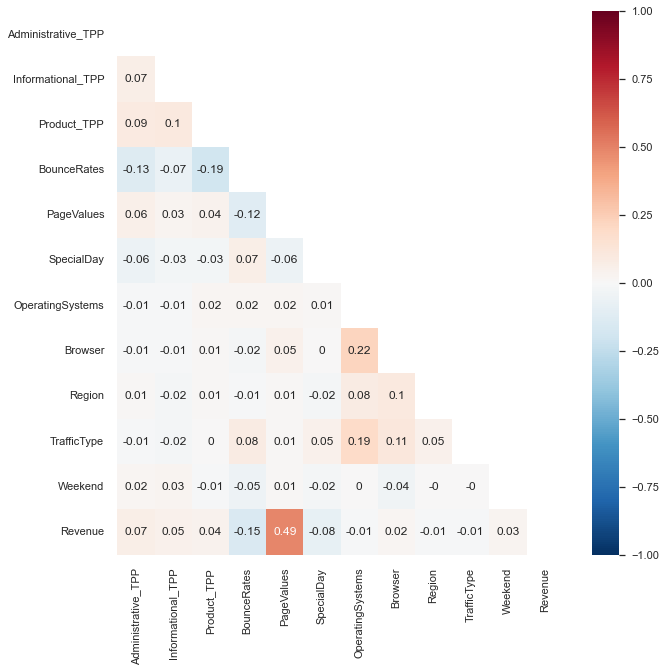

In [107]:
# Check again for correlation
corr = shoppers_cleaned.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap_2nd.png')

## Outliers

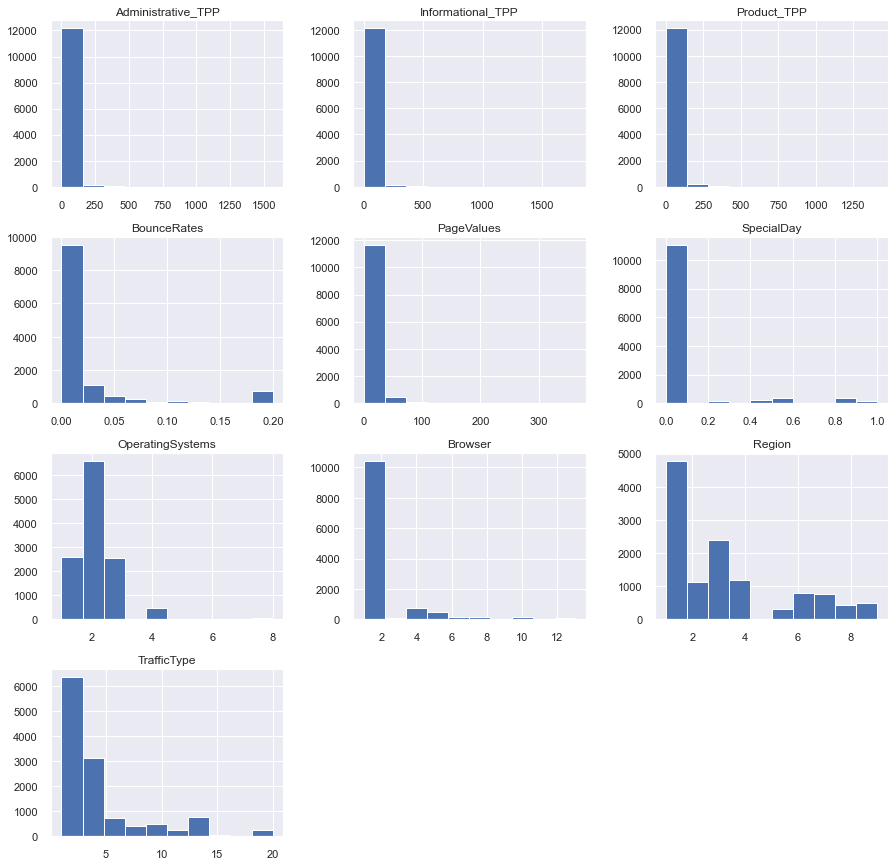

In [108]:
# Check for the variable distributions
shoppers_cleaned.iloc[:,:-2].hist(figsize=(15,15));

Most of the columns have outliers. Let's identify them better using the boxplot

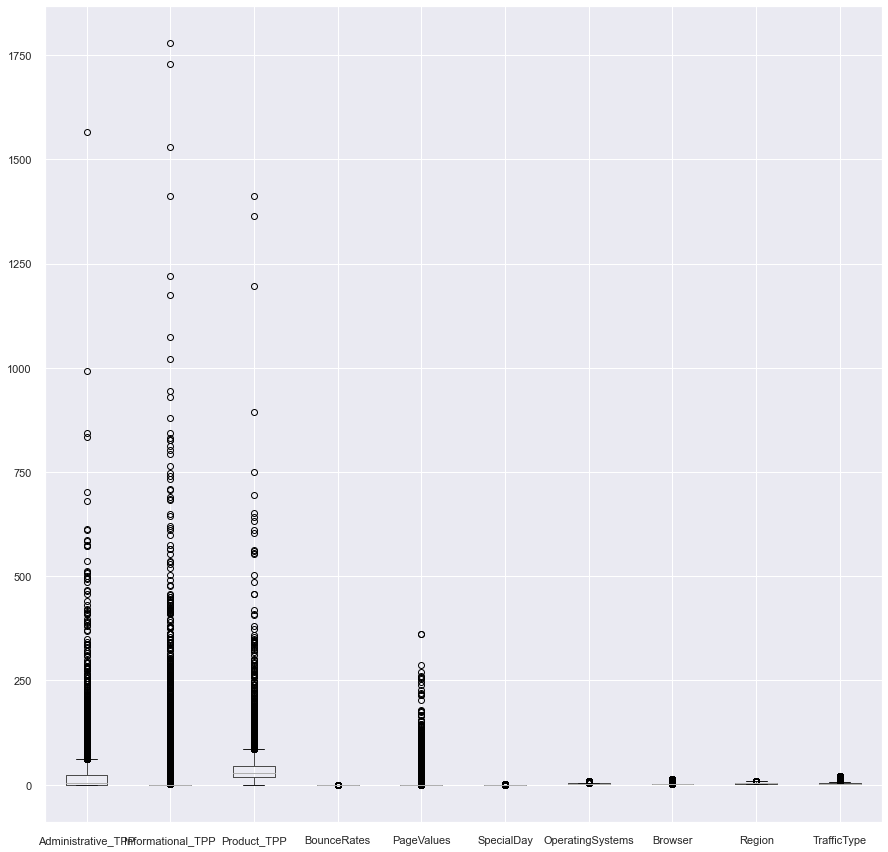

In [109]:
shoppers_cleaned.iloc[:,:-2].boxplot(figsize=(15,15));

In [110]:
shoppers_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_TPP,12330.0,20.196284,45.995573,0.0,0.0000,5.095000,24.360000,1566.600000
Informational_TPP,12330.0,14.807766,65.551321,0.0,0.0000,0.000000,0.000000,1778.000000
Product_TPP,12330.0,37.633679,44.767895,0.0,17.6125,28.880000,45.085000,1411.000000
BounceRates,12330.0,0.022191,0.048488,0.0,0.0000,0.003112,0.016813,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.0000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.0000,0.000000,0.000000,1.000000
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.0000,2.000000,3.000000,8.000000
Browser,12330.0,2.357097,1.717277,1.0,2.0000,2.000000,2.000000,13.000000
Region,12330.0,3.147364,2.401591,1.0,1.0000,3.000000,4.000000,9.000000
TrafficType,12330.0,4.069586,4.025169,1.0,2.0000,2.000000,4.000000,20.000000


In [111]:
shoppers[shoppers.PageValues > 100]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
198,0,0.000000,0,0.000000,17,840.233333,0.000000,0.001667,109.176000,0.0,Mar,2,2,9,2,New_Visitor,False,True
200,1,32.000000,0,0.000000,50,2867.000000,0.000000,0.004000,153.443248,0.0,Mar,2,2,7,8,Returning_Visitor,True,True
1050,1,21.000000,1,61.000000,49,1647.152381,0.000000,0.000800,144.393489,0.0,Mar,2,2,7,2,Returning_Visitor,True,True
1491,5,172.200000,0,0.000000,23,792.722222,0.000000,0.010714,261.491286,0.0,Mar,2,2,1,8,New_Visitor,False,True
2024,0,0.000000,0,0.000000,68,809.245635,0.002985,0.005970,109.912405,0.0,Mar,2,5,4,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,0,0.000000,0,0.000000,7,432.000000,0.000000,0.014286,270.784693,0.0,Nov,2,4,1,8,New_Visitor,False,True
11858,1,42.500000,1,12.833333,104,4054.755952,0.003883,0.010097,141.459054,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12108,0,0.000000,0,0.000000,28,1107.922619,0.014815,0.009877,226.677702,0.0,Dec,8,13,9,20,Other,False,True
12117,1,46.500000,0,0.000000,14,398.979167,0.000000,0.014286,116.337865,0.0,Dec,8,13,9,20,Other,False,True


For the numerical columns we will use the Robust Scaler, since we have outliers in all of them

## Feature Scaling

In [112]:
from sklearn.preprocessing import RobustScaler

shoppers_scaled = shoppers_cleaned.copy()

robust = RobustScaler()
columns = ['Administrative_TPP','Informational_TPP','Product_TPP','PageValues']
robust = robust.fit_transform(shoppers_scaled[columns].values)
shoppers_scaled[columns] = pd.DataFrame(data=robust)

C:\Users\admin\AppData\Local\Temp\ipykernel_16564\689524908.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  shoppers_scaled.iloc[:,:-2].hist(ax=ax)


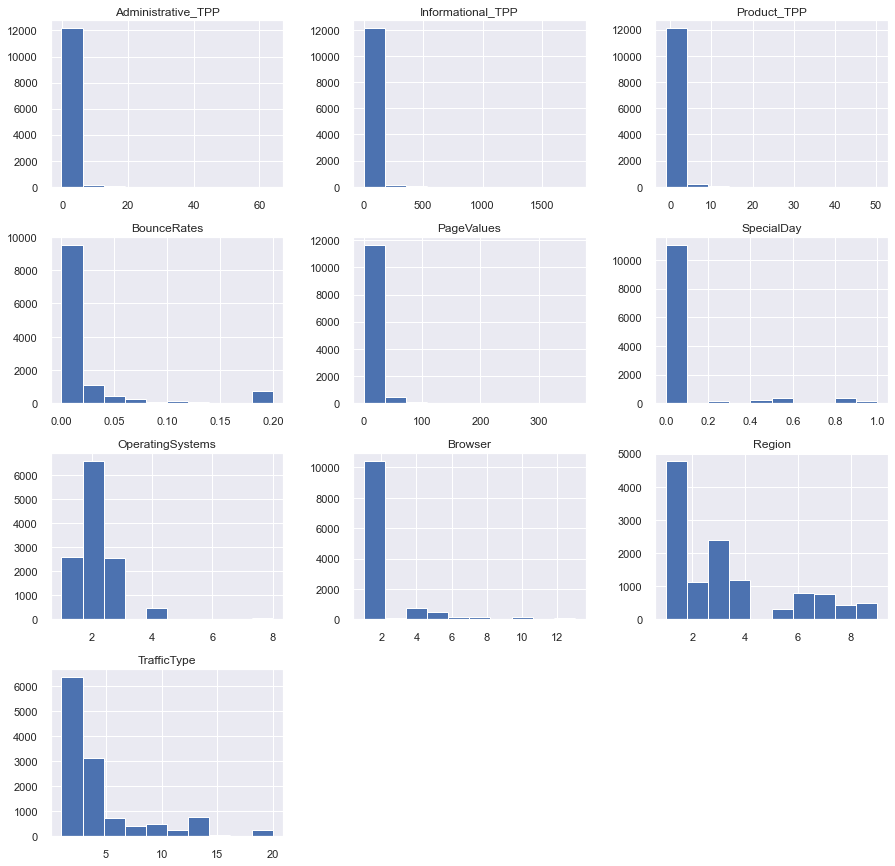

In [113]:
fig, ax = plt.subplots(figsize=(15,15))

shoppers_scaled.iloc[:,:-2].hist(ax=ax)
plt.show()
fig.savefig('Hist_standardized.png');

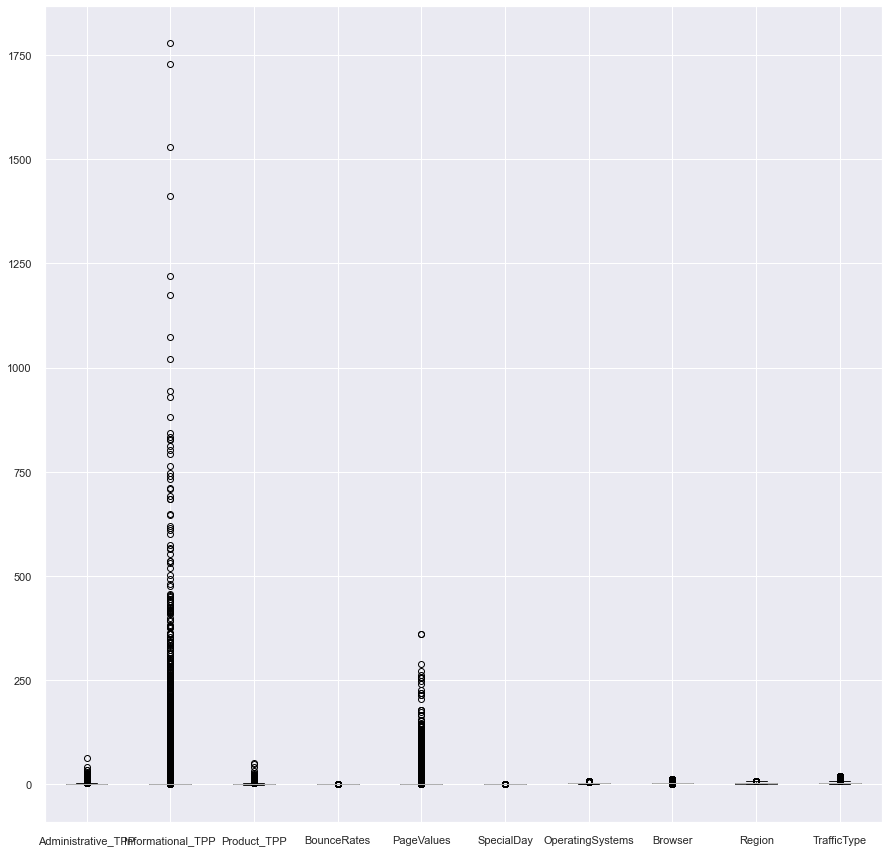

In [114]:
shoppers_scaled.iloc[:,:-2].boxplot(figsize=(15,15));

Apparently the Robust Scaler didn't help a lot taking care of the outliers because we have a lot of them. So we're going to try the Box-Cox method

In [115]:
# 2nd try: Box-Cox
from scipy import stats
shoppers_boxcox = shoppers_cleaned.copy()

shoppers_boxcox['Informational_TPP'] = stats.boxcox(shoppers_boxcox.Informational_TPP.values+1)[0]
shoppers_boxcox['Administrative_TPP'] = stats.boxcox(shoppers_boxcox.Administrative_TPP.values+1)[0]
shoppers_boxcox['Product_TPP'] = stats.boxcox(shoppers_boxcox.Product_TPP.values+1)[0]
shoppers_boxcox['PageValues'] = stats.boxcox(shoppers_boxcox.PageValues.values+1)[0]

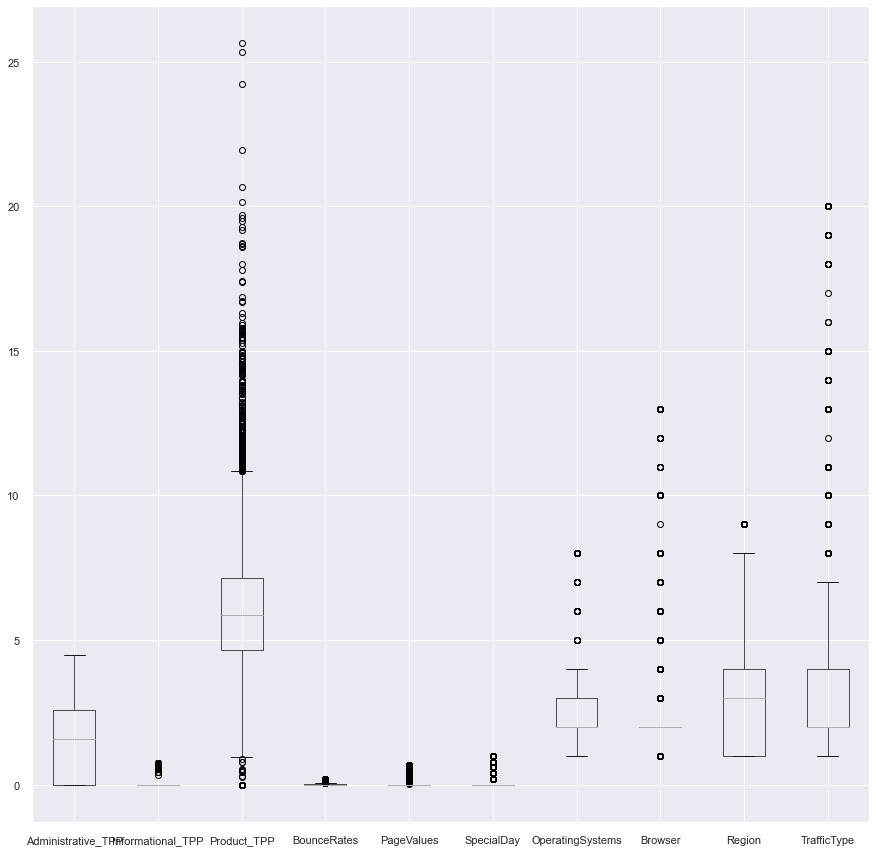

In [116]:
shoppers_boxcox.iloc[:,:-2].boxplot(figsize=(15,15));

C:\Users\admin\AppData\Local\Temp\ipykernel_16564\1444464000.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  shoppers_boxcox.iloc[:,:-2].hist(ax=ax)


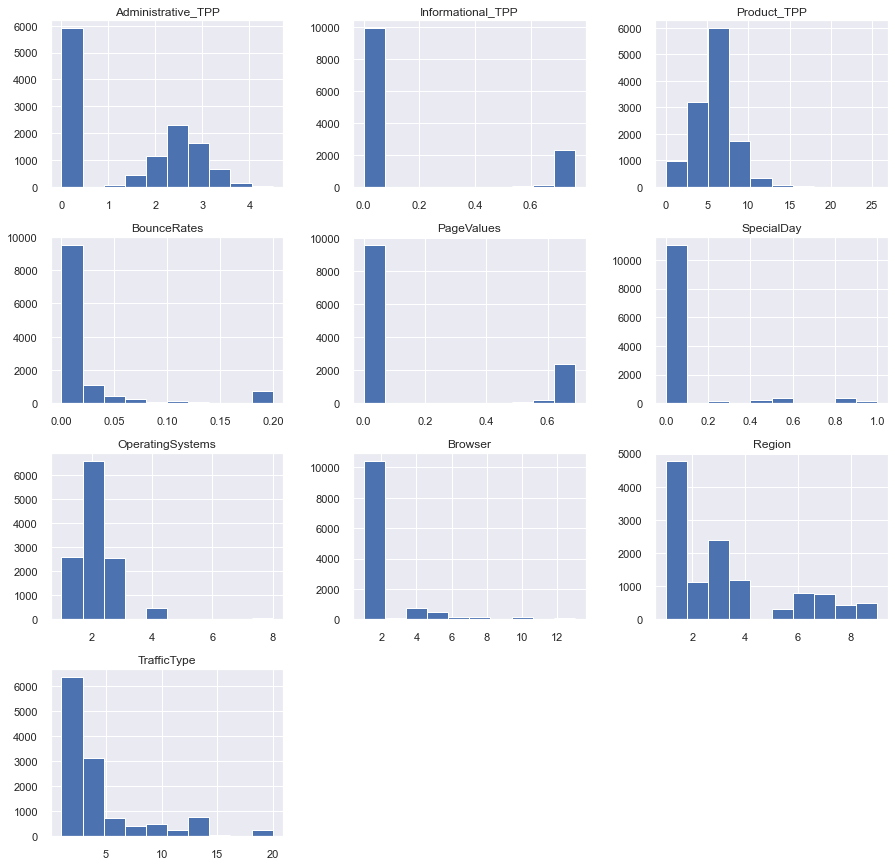

In [117]:
fig, ax = plt.subplots(figsize=(15,15))

shoppers_boxcox.iloc[:,:-2].hist(ax=ax)
plt.show()

The Box-Cox method work better than the feature scaling, so we'll keep these values despite still having outliers

## Categorical columns

In [118]:
shoppers_cleaned = shoppers_boxcox

shoppers_cleaned.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [119]:
shoppers_cleaned.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Might be better to aggregate the Operating Systems with less than 500 values

In [120]:
shoppers_cleaned.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [121]:
top8 = shoppers_cleaned.Browser.value_counts().index[:8]
shoppers_cleaned.Browser = np.where(shoppers_cleaned.Browser.isin(top8)
                                          , shoppers_cleaned.Browser
                                          , 'OTHER'
                                         )

In [122]:
shoppers_cleaned.TrafficType.value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [123]:
top10 = shoppers_cleaned.TrafficType.value_counts().index[:10]
shoppers_cleaned.TrafficType = np.where(shoppers_cleaned.TrafficType.isin(top10)
                                          , shoppers_cleaned.TrafficType
                                          , 'OTHER'
                                         )

In [124]:
shoppers_cleaned.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [125]:
dummies = ['Region','Browser','TrafficType','VisitorType','Month','OperatingSystems']
shoppers_dummies = pd.get_dummies(shoppers_boxcox, columns = dummies, drop_first=True)

In [126]:
shoppers_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative_TPP             12330 non-null  float64
 1   Informational_TPP              12330 non-null  float64
 2   Product_TPP                    12330 non-null  float64
 3   BounceRates                    12330 non-null  float64
 4   PageValues                     12330 non-null  float64
 5   SpecialDay                     12330 non-null  float64
 6   Weekend                        12330 non-null  bool   
 7   Revenue                        12330 non-null  bool   
 8   Region_2                       12330 non-null  uint8  
 9   Region_3                       12330 non-null  uint8  
 10  Region_4                       12330 non-null  uint8  
 11  Region_5                       12330 non-null  uint8  
 12  Region_6                       12330 non-null 

# Feature Selection

In [127]:
from sklearn.feature_selection import SelectKBest, f_classif

X = shoppers_dummies.drop('Revenue', axis=1)
y = shoppers_dummies.Revenue

selector = SelectKBest(f_classif, k=10)

X_new = selector.fit_transform(X, y)

column_names = [column[0]  for column in zip(X.columns,selector.get_support()) if column[1]]

In [128]:
column_names

['Administrative_TPP',
 'Informational_TPP',
 'Product_TPP',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'TrafficType_2',
 'TrafficType_3',
 'VisitorType_Returning_Visitor',
 'Month_Nov']

# Clustering

In [129]:
columns_cluster = shoppers_dummies.drop(column_names, axis=1).drop('Revenue', axis=1)

In [130]:
columns_cluster

,Weekend,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Browser_10,...,Month_May,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12326,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12327,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12328,False,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## KMeans

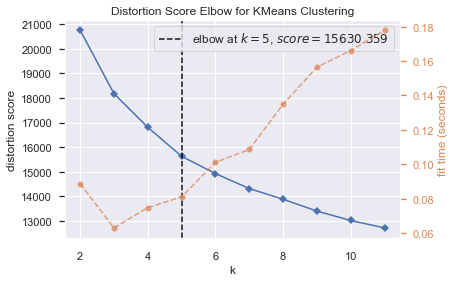

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()

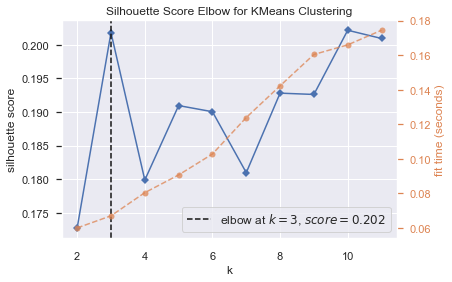

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [135]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()

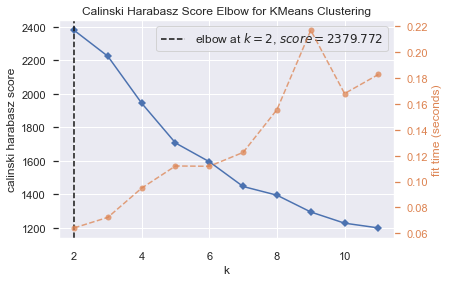

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [136]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()

According to the Elbow, the best number of k is 5. So we'll use that number of clusters

In [137]:
kmeans=KMeans(5)
kmeans.fit(df_pca)
shoppers_dummies['cluster']=kmeans.predict(df_pca)

In [138]:
shoppers_dummies.cluster.value_counts(normalize=True)

3    0.306407
1    0.238605
2    0.206083
4    0.124980
0    0.123925
Name: cluster, dtype: float64

In [139]:
shoppers_dummies

,Administrative_TPP,Informational_TPP,Product_TPP,BounceRates,PageValues,SpecialDay,Weekend,Revenue,Region_2,Region_3,...,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,cluster
0,0.000000,0.0,0.000000,0.200000,0.000000,0.0,False,False,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0.0,6.141920,0.000000,0.000000,0.0,False,False,0,0,...,0,0,1,0,0,0,0,0,0,3
2,0.000000,0.0,0.000000,0.200000,0.000000,0.0,False,False,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.000000,0.0,0.961523,0.050000,0.000000,0.0,False,False,1,0,...,0,0,0,1,0,0,0,0,0,2
4,0.000000,0.0,8.194807,0.020000,0.000000,0.0,True,False,0,0,...,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,2.967319,0.0,6.281482,0.007143,0.673415,0.0,True,False,0,0,...,0,0,0,0,1,0,0,0,0,1
12326,0.000000,0.0,9.613638,0.000000,0.000000,0.0,True,False,0,0,...,0,0,0,1,0,0,0,0,0,2
12327,0.000000,0.0,6.030017,0.083333,0.000000,0.0,True,False,0,0,...,0,0,0,1,0,0,0,0,0,2
12328,2.414960,0.0,5.291598,0.000000,0.000000,0.0,False,False,0,1,...,0,0,1,0,0,0,0,0,0,3


We can see that the clusters kind of are equally distributed. The difference between the cluster with the lowest weight and the one with the highest weight is around 23%

In [140]:
columns_drop = columns_cluster.columns.tolist()

In [141]:
data_model = shoppers_dummies.drop(columns_drop, axis=1)

In [142]:
data_model

,Administrative_TPP,Informational_TPP,Product_TPP,BounceRates,PageValues,SpecialDay,Revenue,TrafficType_2,TrafficType_3,VisitorType_Returning_Visitor,Month_Nov,cluster
0,0.000000,0.0,0.000000,0.200000,0.000000,0.0,False,0,0,1,0,1
1,0.000000,0.0,6.141920,0.000000,0.000000,0.0,False,1,0,1,0,3
2,0.000000,0.0,0.000000,0.200000,0.000000,0.0,False,0,1,1,0,1
3,0.000000,0.0,0.961523,0.050000,0.000000,0.0,False,0,0,1,0,2
4,0.000000,0.0,8.194807,0.020000,0.000000,0.0,False,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,2.967319,0.0,6.281482,0.007143,0.673415,0.0,False,0,0,1,0,1
12326,0.000000,0.0,9.613638,0.000000,0.000000,0.0,False,0,0,1,1,2
12327,0.000000,0.0,6.030017,0.083333,0.000000,0.0,False,0,0,1,1,2
12328,2.414960,0.0,5.291598,0.000000,0.000000,0.0,False,0,0,1,1,3


In [143]:
model_dummies = pd.get_dummies(data_model, columns=['cluster'], drop_first=True)

# Classification Modelling

We're going to run every classification model to check which one has the best score

We will also need to use SMOTE because we have an imbalanced dataset

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_dummies.drop('Revenue', axis=1)
                                                    ,model_dummies.Revenue
                                                    ,stratify=model_dummies.Revenue
                                                    ,random_state=11)

In [145]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [146]:
over=BorderlineSMOTE(sampling_strategy=0.3, k_neighbors=6)
under=RandomUnderSampler(sampling_strategy=0.4)
model=DecisionTreeClassifier()

steps=[('o',over),('u',under),('model',model)]
pipe=Pipeline(steps=steps)
cv=RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)

scores=cross_val_score(pipe, X_train.values, y_train.values.astype('float'), scoring='precision', cv=cv, n_jobs=-1)
print('Mean precision is',np.mean(scores))

Mean precision is 0.5099670537023042


In [147]:
LG = LogisticRegression(max_iter = 10000, class_weight='balanced')
steps=[('o',over),('u',under),('model',LG)]
pipe=Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pred1=pipe.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print('Precision Score: '+str(precision_score(y_test,y_pred1).round(2)))
print('Accuracy Score: '+str(accuracy_score(y_test,y_pred1).round(2)))

[[2254  352]
 [  83  394]]
Precision Score: 0.53
Accuracy Score: 0.86


In [148]:
knn = KNeighborsClassifier()
steps=[('o',over),('u',under),('model',knn)]
pipe=Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pred1=pipe.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print('Precision Score: '+str(precision_score(y_test,y_pred1).round(2)))
print('Accuracy Score: '+str(accuracy_score(y_test,y_pred1).round(2)))

[[2315  291]
 [ 203  274]]
Precision Score: 0.48
Accuracy Score: 0.84


Let's automate the cross-validation so that we don't have to run each model at a time

So applying the PCA in each model decreased the recall, precision and accuracy scores in every model.

### AdaBoost

In [149]:
ada = AdaBoostClassifier(random_state=42)
random_grid = {'n_estimators': range(50,150,10),
               'algorithm': ['SAMME','SAMME.R']
              }

In [150]:
grid_search=GridSearchCV(estimator=ada
                               ,param_grid=random_grid
                               ,n_jobs=-1
                               ,scoring='precision'
                               ,cv=cv
                              )

pipe_ada=Pipeline([('o',over),('u',under), ('model',grid_search)])

In [151]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('o', BorderlineSMOTE(k_neighbors=6, sampling_strategy=0.3)),
                ('u', RandomUnderSampler(sampling_strategy=0.4)),
                ('model',
                 GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=7, random_state=1),
                              estimator=AdaBoostClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                                          'n_estimators': range(50, 150, 10)},
                              scoring='precision'))])

In [152]:
print(pipe_ada['model'].best_score_)
print(pipe_ada['model'].best_params_)

0.7855207797543338
{'algorithm': 'SAMME.R', 'n_estimators': 140}


With the Hyperparameter Tunning we've also managed to increase the precision score of the AdaBoost model

### AdaBoost

In [153]:
# Baseline model
base = AdaBoostClassifier()
base.fit(X_train, y_train)

print('Accuracy Score: '+str(accuracy_score(y_test, base.predict(X_test)).round(2)))
print('Precision Score: '+str(precision_score(y_test, base.predict(X_test)).round(2)))
print('Recall Score: '+str(recall_score(y_test, base.predict(X_test)).round(2)))
print('F1 Score: '+str(f1_score(y_test, base.predict(X_test)).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, base.predict_proba(X_test)[:,1]).round(2)))

Accuracy Score: 0.89
Precision Score: 0.7
Recall Score: 0.56
F1 Score: 0.62
AUC Score: 0.91


In [154]:
# Pipe model
y_pred = pipe_ada.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score: '+str(accuracy_score(y_test, y_pred).round(2)))
print('Precision Score: '+str(precision_score(y_test, y_pred).round(2)))
print('Recall Score: '+str(recall_score(y_test, y_pred).round(2)))
print('F1 Score: '+str(f1_score(y_test, y_pred).round(2)))
print('AUC Score: '+str(roc_auc_score(y_test, pipe_ada.predict_proba(X_test)[:,1]).round(2)))

[[2379  227]
 [ 137  340]]
Accuracy Score: 0.88
Precision Score: 0.6
Recall Score: 0.71
F1 Score: 0.65
AUC Score: 0.91


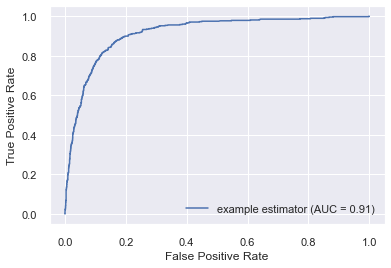

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pipe_ada.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  # doctest: +SKIP
plt.show()      # doctest: +SKIP